# Introduction to data analysis - part 3bis: pandas

our objective here is to introduce you to `pandas`as this library has become the python workhorse for analysing any dataset that most chemists (or biologists) would naturally handle in excel. 

## 1. loading the dataset

we will do that with a data set from Grenoble's air quality authority, which are publicaly available here, in case your curiosity strikes you...: http://www.air-rhonealpes.fr/donnees/telecharger

As getting the data through this interface is kind of clumsy, a version is available from the following file:
`/data/station_heure_20120101-20200301.csv`

This datafile contains data from the following:

- stations
    - Grenoble Rocade Sud: this is a "traffic" station, south of Grenoble, near a major road interchange
    - Grenoble les Frènes: this an "urban backgound" station, in the middle of a big city park 
    - Saint-Martin d'Hères: this is an "urban" station, near the university
    - Sud grenoblois / Champ-sur-Drac: this is a "suburban" station, at ~15 km south of Grenoble city-center
    - Fontaine les Balmes : this is an "urban" station, west of Grenoble city center
    - Est grenoblois / grésivaudan: this is a "suburban" station, at ~20 km east of Grenoble city-center (in Crolles)
    - plateau de Bonnevaux: this is a "regional background" station, in a rural area between Grenoble and Lyon
- pollutants
    - the main gaseous pollutants : NO, NO<sub>2</sub>, O<sub>3</sub>
    - particulate pollution : PM10, PM2.5

![](../docs/carte-grenoble.png)

before openong the file in python, it is always good to take a look at the file. this can be done by opening it with excel (not here: the file is too weird), or with a text editor, or as we will do here, from the command line

also remember a few useful unix commands:
- remember `ls` - `cd XXX` - `pwd`
- `head`: outputs the first few lines of a text file
- `tail`: outputs the last few lines of a text file
- `more`: outputs all the text file (very bad if too big a file...)
- `cut -c-80`: outputs the first 80 characters of every line of a text file

In [1]:
%%bash 
#this magic command tells the rest of the cell that this is not python, 
#but the command line 

cut -c-80 data/station_heure_20120101-20200301.csv


Station;Polluant;Mesure;Unité;01/01/2012 0:00;01/01/2012 1:00;01/01/2012 2:00;01
Fontaine les Balmes;Dioxyde d'azote;Dioxyde d'azote;microg/m3;-;-;38;44;45;42;46
Fontaine les Balmes;Monoxyde d'azote;Monoxyde d'azote;microg/m3;-;-;4;14;14;14;2
Fontaine les Balmes;Ozone;Ozone;microg/m3;-;-;3;0;0;0;0;1;2;1;4;10;9;12;17;18;16
Fontaine les Balmes;Particules PM10;Particules PM10;microg/m3;-;-;24;30;35;34;45
Saint-Martin d'Heres;Dioxyde d'azote;Dioxyde d'azote;microg/m3;-;-;45;43;40;40;3
Saint-Martin d'Heres;Monoxyde d'azote;Monoxyde d'azote;microg/m3;-;-;17;17;16;15
Saint-Martin d'Heres;Ozone;Ozone;microg/m3;-;-;0;0;0;0;0;0;0;0;2;9;10;13;18;27;2
Saint-Martin d'Heres;Particules PM10;Particules PM10;microg/m3;-;-;44;46;42;37;3
Saint-Martin d'Heres;Particules PM2.5;Particules PM2.5;microg/m3;-;-;-;-;-;-;-;-
Grenoble Rocade Sud;Dioxyde d'azote;Dioxyde d'azote;microg/m3;-;-;37;46;55;57;40
Grenoble Rocade Sud;Monoxyde d'azote;Monoxyde d'azote;microg/m3;-;-;16;32;60;64;
Grenoble Rocade Sud;Particul

OK...
- data are separated by ';'
- '-' signals 'no data'
- one line is the time series of one pollutant in one given station
- the first line contains the date/time of measurements
- the first two columns contain long station and pollutant names
- the following 2 columns do not seem very usefull

`pandas` gives us a `DataFrame`, which looks pretty much like an excel spreadcheet. For a quick description, see :
- the cheatsheet *basic for pandas* : http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3
- the first page of [advanced cheatsheet](./docs/Enthought-Python-Pandas-Cheat-Sheets-1-8-v1.0.2.pdf)

we are going to import the csv file into a `DataFrame`, and look a bit at the result

In [2]:
import pandas as pd

df = pd.read_csv('data/station_heure_20120101-20200301.csv',
                 sep=';',
                 na_values='-',
                )

df_backup = df.copy()  

print(df.info())

df.head() #only prints out the first 5 lines....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 71597 entries, Station to 02/03/2020 0:00
dtypes: float64(71593), object(4)
memory usage: 19.7+ MB
None


,Station,Polluant,Mesure,Unité,01/01/2012 0:00,01/01/2012 1:00,01/01/2012 2:00,01/01/2012 3:00,01/01/2012 4:00,01/01/2012 5:00,...,01/03/2020 15:00,01/03/2020 16:00,01/03/2020 17:00,01/03/2020 18:00,01/03/2020 19:00,01/03/2020 20:00,01/03/2020 21:00,01/03/2020 22:00,01/03/2020 23:00,02/03/2020 0:00
0,Fontaine les Balmes,Dioxyde d'azote,Dioxyde d'azote,microg/m3,NaN,NaN,38.0,44.0,45.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fontaine les Balmes,Monoxyde d'azote,Monoxyde d'azote,microg/m3,NaN,NaN,4.0,14.0,14.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fontaine les Balmes,Ozone,Ozone,microg/m3,NaN,NaN,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fontaine les Balmes,Particules PM10,Particules PM10,microg/m3,NaN,NaN,24.0,30.0,35.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Saint-Martin d'Heres,Dioxyde d'azote,Dioxyde d'azote,microg/m3,NaN,NaN,45.0,43.0,40.0,40.0,...,4.0,4.0,4.7,5.7,20.2,40.5,16.2,25.8,33.0,27.9


Clearly, thousands of columns and tens of lines is not very practical... So we probably need to reformat all that.

**loading data can be long, so we did copy the initial import before fumbling with it**

### 2. clean up and simplification... (80% of the usual trouble...)

Two things we may want to do:
1. get rid of useless columns: `.drop()`method

2. rename pollutants and stations with shorter names, for practicality...

the second happens in columns  'Station' and 'Polluant', which can respectively be accessed by `df['Station']`and `df['Polluant']`

as pandas loves you, it provides  a `.replace(dict)` method that does exactly what you want

> In general, for all those translation jobs, what is used is a data type called a  *[dictionnary](https://www.python-course.eu/python3_dictionaries.php)*. 

> This looks like an array for which individual elements are accesssed not by their *index number*, but by their *key*.

> A few important expressions to work with dictionaries. if `dic` is a dictionary:
> - `dic['toto']` : returns the element in the dictionary whose key is `'toto'`
> - `dic.keys()` : returns the list of the keys in the dictionary
> - `dic.values()` : returns the list of elements in the dictionary
> - `'toto' in dic` : returns `True` if `'toto'` is a key in `dic`
> - `'toto' in dic.values()` : returns `True` if `'toto'` is an element in `dic`


**Remark:**

a "naive" implementation to replace the elements would be to loop through the rows of the dataframe and replace one by one... (Matlab-like or C-like...). this would need:

- nb of lines in the dataframe: `len(df)`
- `df.iloc[row_nb,col_nb]`: gives access to the element in the column number `col_nb` and row number `row_nb`


Another implementation, potentially more efficient, consists in defining a translation function (x) and then to apply the `.apply()` method on the columns to modify them. This method allows you to apply to each element of the column (here *'Pollutant'* or *'Station'*) the function passed to it as an argument. It is vectorized in pandas, and normally much more efficient than a loop (loops are always slow).


In [39]:
#%%timeit    # permet de chronométrer la cellule
df = df_backup.copy()  #start clean from the backup, so that the cell can be run several times

new_station_names = {"Saint-Martin d'Heres":"Campus" , 
                     "Grenoble Rocade Sud":"Traffic" , 
                     "Grenoble les Frenes":"Urban bckgd" ,
                     "Sud grenoblois / Vif" : "Suburban South", 
                     "Sud grenoblois / Champ sur Drac" : "Suburban South Champ", 
                     "Est grenoblois / Grésivaudan":"Suburban East" , 
                     "Plateau de Bonnevaux":"Regional bckgd" ,
                     "Fontaine les Balmes":"Suburban West"}

new_poll_names = {"Dioxyde d'azote":"NO2", "Monoxyde d'azote":"NO", 
                  "Ozone":"O3", "Particules PM10":"PM10", 
                  "Particules PM2,5":"PM2.5", "Dioxyde soufre":"SO2"}

df['Station'] = df['Station'].replace(new_station_names)
df['Polluant'] = df['Polluant'].replace(new_poll_names)

df = df.drop(['Mesure','Unité'], axis='columns')

df = df.T
#df = df.set_index(['Station','Polluant']).T

#df.index = pd.to_datetime(df.index, dayfirst=True)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 71595 entries, Station to 02/03/2020 0:00
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       52198 non-null  object
 1   1       52233 non-null  object
 2   2       52306 non-null  object
 3   3       52215 non-null  object
 4   4       70085 non-null  object
 5   5       69723 non-null  object
 6   6       69660 non-null  object
 7   7       68859 non-null  object
 8   8       615 non-null    object
 9   9       70604 non-null  object
 10  10      70581 non-null  object
 11  11      69481 non-null  object
 12  12      69674 non-null  object
 13  13      70352 non-null  object
 14  14      69476 non-null  object
 15  15      69890 non-null  object
 16  16      63736 non-null  object
 17  17      69456 non-null  object
 18  18      69455 non-null  object
 19  19      70195 non-null  object
 20  20      70223 non-null  object
 21  21      70580 non-null  object
 22  22      694

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Station,Suburban West,Suburban West,Suburban West,Suburban West,Campus,Campus,Campus,Campus,Campus,Traffic,...,Suburban East,Suburban East,Suburban East,Suburban East,Suburban East,Regional bckgd,Regional bckgd,Regional bckgd,Regional bckgd,Regional bckgd
Polluant,NO2,NO,O3,PM10,NO2,NO,O3,PM10,Particules PM2.5,NO2,...,NO2,NO,O3,PM10,Particules PM2.5,NO2,NO,O3,PM10,Particules PM2.5
01/01/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2012 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2012 2:00,38,4,3,24,45,17,0,44,NaN,37,...,33,29,2,57,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Saving data

As all this was long and painful, you should save the work !!! 

**use the method: `.to_csv(filename,sep=';')`**



In [4]:
#your code here
df.to_csv('./data/clean_data_hour.csv', sep=';')

### 3. selecting data 

From here on, it is possible to access directly each time serie through the multi-index. This access must always be in the order defined for the multi-index. Here, ['Station', 'Polluant']

**print the first column (NO2 on the Campus)**

In [4]:
#your code here

df[('Campus','NO2')]  #try others !

2012-01-01 00:00:00     NaN
2012-01-01 01:00:00     NaN
2012-01-01 02:00:00    45.0
2012-01-01 03:00:00    43.0
2012-01-01 04:00:00    40.0
                       ... 
2020-03-01 20:00:00    40.5
2020-03-01 21:00:00    16.2
2020-03-01 22:00:00    25.8
2020-03-01 23:00:00    33.0
2020-03-02 00:00:00    27.9
Name: (Campus, NO2), Length: 71593, dtype: float64

It is also possible to access one pollutant in all stations. This is possible through the `df.xs()` method, which provides an easy access in the multi-index

In [5]:
df.xs('NO2', level='Polluant', axis=1).tail()

Station,Suburban West,Campus,Traffic,Urban bckgd,Suburban South,Grenoble Grands Boulevards,Suburban East,Regional bckgd
2020-03-01 20:00:00,NaN,40.5,58.5,35.6,7.7,71.2,15.1,3.9
2020-03-01 21:00:00,NaN,16.2,42.6,24.2,8.3,53.2,10.1,4.7
2020-03-01 22:00:00,NaN,25.8,49.8,23.1,7.4,65.5,8.8,5.3
2020-03-01 23:00:00,NaN,33.0,60.4,25.1,9.3,41.6,11.1,4.0
2020-03-02 00:00:00,NaN,27.9,52.9,20.8,6.4,37.5,14.3,2.4


or to all pollutants in one station (**You do it !!!**)

In [6]:
df.xs('Campus', level='Station', axis=1).tail()

Polluant,NO2,NO,O3,PM10,Particules PM2.5
2020-03-01 20:00:00,40.5,0.3,29.6,6.3,5.9
2020-03-01 21:00:00,16.2,-0.1,59.0,5.2,3.2
2020-03-01 22:00:00,25.8,0.1,38.4,4.8,4.6
2020-03-01 23:00:00,33.0,0.2,28.3,9.8,7.8
2020-03-02 00:00:00,27.9,0.1,24.1,9.9,6.6


good, now we have the bricks needed to select a sub-dataset and play !!!

**modify this code to:**
- **extract one pollutant in all stations (where it is present), in _dfpollutant_**
- **extract one station with several pollutants in _dfstation_ (with one line of code ?)**
- **print the head of your dataframe**

NB: we create new tables to access our subdataset, but of course we keep the original dataframe available... raw data is sacred !!!

In [7]:
dfpollutant = df.xs('NO2', level='Polluant', axis=1)
dfstation = df.xs('Campus', level='Station', axis=1)

some important tools to investigate a DataFrame...

In [8]:
dfpollutant.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2020-03-01 15:00:00', '2020-03-01 16:00:00',
               '2020-03-01 17:00:00', '2020-03-01 18:00:00',
               '2020-03-01 19:00:00', '2020-03-01 20:00:00',
               '2020-03-01 21:00:00', '2020-03-01 22:00:00',
               '2020-03-01 23:00:00', '2020-03-02 00:00:00'],
              dtype='datetime64[ns]', length=71593, freq=None)

### 3.4. first plot

good... now is the time of your first plot !!!!

`.plot()` is a method to plot the dataframe content. by default, it will plot all the columns as a fonction of the index. but it has many more possibilities. (see `df.plot?`, or the  [advanced cheatsheet](./docs/Enthought-Python-Pandas-Cheat-Sheets-1-8-v1.0.2.pdf), )



<AxesSubplot:>

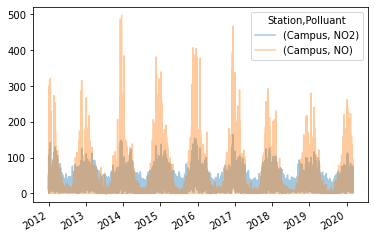

In [13]:
#your code here
df.plot(y=[('Campus','NO2'),('Campus','NO')],alpha=0.4)


then recreate our partial datasets, that should now have a clean index

### 3.6. slices and more plots  !!!

the greatest thing about datetime indexes is that they provide a super-easy access to slices of the dataframe. 

the general syntax would be:
- `df['start':'end']` where *'start'* and *'end'* represent complete or partial datetime normalised string
- `df['date']` where *'date'* is a standard date

on va commencer avec les fonctions de tracé intégrées dans pandas, qui s'appuient très fort sur matplotlib. 
si on veut changer l'étendue temporelle de notre graphe, il suffit d'utiliser la syntaxe de tranche de python, sur un de vos dataframe (*dfpolluant* et/ou *dfstation*). en cas de besoin, voir l'aide-mémoire !!!

**try this :**
- **plot only year 2012**
- **plot only winter 2014-2015 (december to february)**
- **plot only 1 month**
- **plot only 2 weeks**
- **plot only your last birthday**
- **at what time scale do you observe variability ?**

<AxesSubplot:>

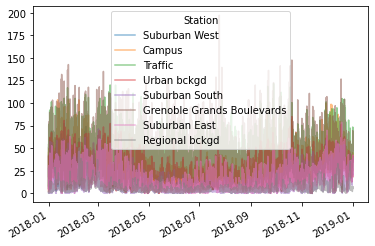

In [17]:
dfpollutant['2018'].plot(alpha=0.5)

### 3.7. Resample, check WHO air quality and share your plots!

The problem with the hourly frequency is that you don't see much. In order to better visualize the data, we can use the `resample` function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html), which allows us to rescale our data by day (`'D'`), month (`'M'`) or year (`'Y'`). 

> *NOTE: moving averages are another way to smooth out some variability... use `.rolling()`, instead of `.resample()`*

1. **Try to use this function visualize the data at different frequencies.**
2. **Choose a station and a pollutant, and try to check if the WHO recommendations are respected** (https://www.c40knowledgehub.org/s/article/WHO-Air-Quality-Guidelines?language=en_US#:~:text=By%20reducing%20air%20pollution%20levels,than%203%20times%20a%20year.)

<AxesSubplot:>

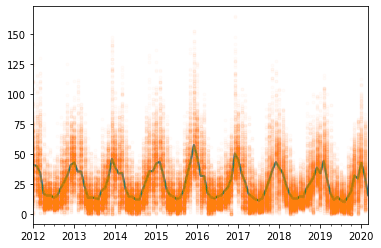

In [18]:
# your input here

my_ax = df['Campus', 'NO2'].resample('M').mean().plot(linewidth=2)

df['Campus', 'NO2'].plot(style='.', ax=my_ax, alpha=0.02)


### 3.8. Share your plots!

1. Go to https://app.mural.co/t/variabiliteclimatique4363/m/variabiliteclimatique4363/1632750150945/18bfd3f99d91bcebbc0e38b48161b6464e8a365a?sender=ufcbfba826e94d93c633c7410
2. Choose a station and a pollutant by putting a note with your name in a cell that has not yet been chosen
3. Adapt the code bellow to produce your figure, then save it and share it on the whiteboard to compare with other pollutants/stations!

NB: Choose a frequency consistent with the WHO recommendations, and a time period that allow to see what time of the year the levels are above WHO recommended guidelines.

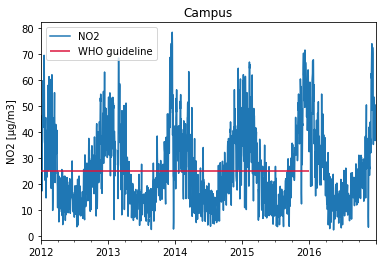

In [19]:
import matplotlib.pyplot as plt

station = 'Campus'
polluant = 'NO2'
start = '2012'
stop = '2016'

df[station, polluant][start:stop].resample('D').mean().plot(label=polluant)
plt.hlines(y=25, xmin=start, xmax=stop, color='crimson', label='WHO guideline', zorder=10)
plt.legend()
plt.ylabel(polluant+ ' [µg/m3]')
plt.title(station)
# plt.savefig(station+'_'+polluant+'_'+start+'-'+stop+'.jpg', dpi=300)
plt.show()

## groupby and masks... the tools for climatologies !!!!

what we now want to do is average cycles: 
- average annual cycles
- average daily cycles
- for the latter, maybe differentiate summer and winter ?

the right tool for that is `.groupby()`

first annual average cycles...

<AxesSubplot:>

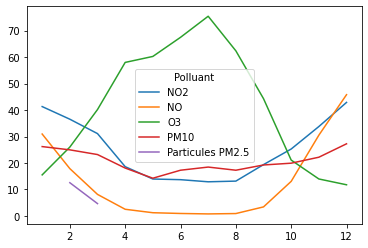

In [20]:
dfstation.groupby(dfstation.index.month).mean().plot()

diurnal cycles...

<AxesSubplot:>

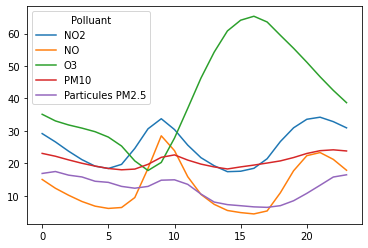

In [21]:
dfstation.groupby(dfstation.index.hour).mean().plot()

another good thing would be to also represent variability around those average values


()

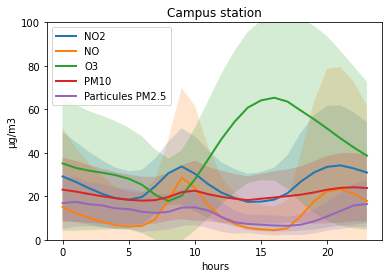

In [26]:
def cute_plot(df, grouping):
    mon_df = df.copy()
    quantile=0.25
    if grouping == 'daily':
        grouping_function = mon_df.index.hour
    if grouping == 'weekly':
        grouping_function = mon_df.index.weekday
    if grouping == 'annual':
        grouping_function = mon_df.index.month
    estime = mon_df.groupby(grouping_function).mean()
    std = mon_df.groupby(grouping_function).std()
    bas,haut = estime-std,estime+std
    
    
    # trace les choses joliement   
    d = estime.index.values
    plt.figure()
    try:
        for col in estime.columns:
            base_line, = plt.plot(d, estime[col],linewidth=2, label=col)
            plt.fill_between(d, bas[col].values, haut[col].values, 
                     facecolor=base_line.get_color(), alpha=0.2)
    except AttributeError:
        base_line, = plt.plot(d, estime,linewidth=2, label=estime.name)
        plt.fill_between(estime.index.values, bas.values, 
                     haut.values, facecolor=base_line.get_color(), alpha=0.2)
#     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.legend()
    return plt.gca()

######################
# enter your code here 

my_ax = cute_plot(dfstation, 'daily')
my_ax.set(ylim=(0,100),title='Campus station',xlabel='hours',ylabel='µg/m3')

()

## masks...

a mask is a `pd.Series` of booleans asserting some condition. in the `pd.Series`, for a given index, the value will be `True` or `False`.

using a mask in to slice a `pd.Dataframe`gives access only to the lines where the condition is `True`

we want a summer mask, a winter mask and a week-end mask...

In [34]:
wintermask = (dfstation.index.month > 11) | (dfstation.index.month < 3)
summermask = (dfstation.index.month > 5) & (dfstation.index.month < 9)

weekendmask = (dfstation.index.day)>4

''

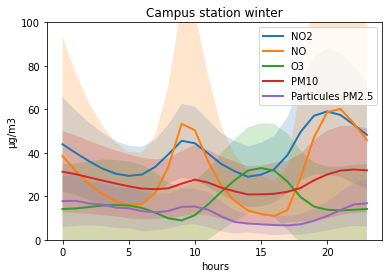

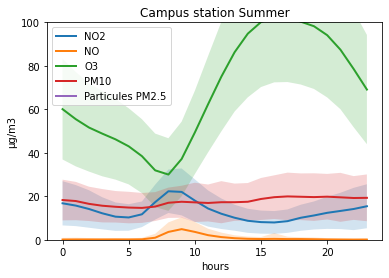

In [36]:
cute_plot(dfstation[wintermask],'daily'
            ).set(ylim=(0,100),title='Campus station winter',xlabel='hours',ylabel='µg/m3')
cute_plot(dfstation[summermask],'daily'
            ).set(ylim=(0,100),title='Campus station Summer',xlabel='hours',ylabel='µg/m3')

''

you could also check the week-end effect: due to different social behaviors, 
air quality is statistically different on wordays and weekend days...

maybe more so in a given season ?

again, you can plot some of those cycles, and share them here:

https://jamboard.google.com/d/1hs-Tz_-ylQ8fYeAyWoklRXyLEBxh5aISks5M6rUiaUk/edit?usp=sharing




## Trends...


last item to end up the introduction to pandas... trends analysis !!!

in order to do that, we will use a deeper data set, from the same place: daily averaged values since 2000...



In [47]:
df_long = pd.read_csv('./data/station_jour_2000-2020.csv',sep=';',na_values='-')
df_long.drop(['Mesure','Unité'],axis='columns',inplace=True)

df_long['Station'] = df_long['Station'].replace(new_station_names)
df_long['Polluant'] = df_long['Polluant'].replace(new_poll_names)

df_long = df_long.set_index(['Station','Polluant']).T.dropna(how='all')

df_long.index = pd.to_datetime(df_long.index, dayfirst=True)
df_long.head()

Station    Suburban South Champ             Suburban West                  \
Polluant                    NO2    NO    O3           NO2    NO   O3 PM10   
2000-01-01                 25.0   8.0  12.0          44.0  20.0  8.0  NaN   
2000-01-02                 28.0  13.0  10.0          43.0  27.0  7.0  NaN   
2000-01-03                 32.0  23.0   9.0          56.0  58.0  4.0  NaN   
2000-01-04                 42.0  33.0  11.0          68.0  92.0  3.0  NaN   
2000-01-05                 37.0  31.0   9.0          55.0  46.0  5.0  NaN   

Station    Campus              ... Traffic                            \
Polluant      NO2     NO   O3  ...     NO2  NO PM10 Particules PM2.5   
2000-01-01    NaN    NaN  9.0  ...     NaN NaN  NaN              NaN   
2000-01-02    NaN    NaN  6.0  ...     NaN NaN  NaN              NaN   
2000-01-03    NaN    NaN  6.0  ...     NaN NaN  NaN              NaN   
2000-01-04    NaN    NaN  3.0  ...     NaN NaN  NaN              NaN   
2000-01-05   58.0  241.0  4.0  ...     NaN NaN  NaN              NaN   

Station    Urban bckgd                                    
Polluant           NO2 SO2  NO  O3 PM10 Particules PM2.5  
2000-01-01         NaN NaN NaN NaN  NaN              NaN  
2000-01-02         NaN NaN NaN NaN  NaN              NaN  
2000-01-03         NaN NaN NaN NaN  NaN              NaN  
2000-01-04         NaN NaN NaN NaN  NaN              NaN  
2000-01-05         NaN NaN NaN NaN  NaN              NaN  

[5 rows x 22 columns]

We now want to do some trend analysis on the longest time series

Many options are available for that: 
- regular linear regression
- more advanced non parametric methods
- other...

### 3.1. Linear regression

We will start with a simple linear regression. one implementation of linear regression is `linregress` within the core statistical python library `scipy.stats`

here, we want to carry out a linear regression between time and a concentration variable. Time, as a date - hour is a complex animal. Is it a number? Is it an alphanumeric object? It depends on the way the language actually handles time. Within pandas, datetime is a number, in nanosecond since 1970-01-01...
- the good thing: it is a number! So we can calculate regressions
- the bad thing: it has stupid units (nanoseconds)! So we need to "convert" it

The conversion is done by calculating an x that will be explicitely a number in the right unit (here, we choose year).

Note that pandas actually knows how to substract a date to another date to get a `Timedelta` (which is a duration).

In [48]:
from scipy import stats

#we limit ourselves to one station, also to get rid of the multi-index...

df_champ = df_long['Suburban South Champ']#.copy()
df_champ['x'] = (df_champ.index - pd.Timestamp("2000-01-01")) / pd.Timedelta('1y')

#stats.linregress?

df_champ.head()

<ipython-input-48-889042c58c8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champ['x'] = (df_champ.index - pd.Timestamp("2000-01-01")) / pd.Timedelta('1y')


Polluant,NO2,NO,O3,x
2000-01-01,25.0,8.0,12.0,0.000000
2000-01-02,28.0,13.0,10.0,0.002738
2000-01-03,32.0,23.0,9.0,0.005476
2000-01-04,42.0,33.0,11.0,0.008214
2000-01-05,37.0,31.0,9.0,0.010952


In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_champ[['x','NO2']].dropna())

#below is a pretty way of printing with a defined format
print('{:2.2f} ± {:2.2f} µg m-3 per decade'.format(slope*10,std_err*10))
print('p_value: {:2.1e} probability that the slope is actually zero'.format(p_value))

-6.05 ± 0.24 µg m-3 per decade
p_value: 5.1e-133 probability that the slope is actually zero


We now want to draw the curves with the fitted linear trend. 

The first option is to calculate the fitted values in a new column, using the intercept and slope obtained from linregress, and really draw the variable and the calculated fit.

This is in the next cell, with a monthly resampling, because otherwise it is desperately cluttered.

<ipython-input-54-1a9ee3da8fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champ['fit']=intercept+slope*df_champ['x']


<AxesSubplot:>

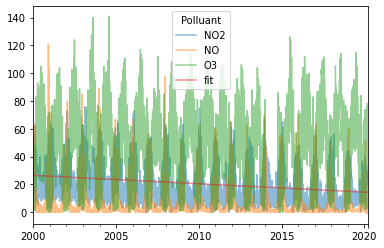

In [54]:
df_champ['fit']=intercept+slope*df_champ['x']

df_champ.drop('x',axis='columns').plot(alpha=0.5)


### 3.2. Other kinds of trend analysis

Another very good library to explore is statmodels: https://github.com/statsmodels/statsmodels

it offers normally a more consistent statistical analysis framework, and is meant to work seamlessly with pandas

amongst tings, it has a naive seasonal decomposition that can be applied to our problem here: `stats.tsa.seasonal_decompose`